## Import libraries

In [4]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data/cleaned_chicken_market_study_data.csv', sep=',')
df.head()

,Country Name,Country Code,Total Population,Access to Electricity (%),Population Growth Rate,Urban Population Growth Rate,Urban Population,Political Stability Index,Regulatory Quality Index,Logistics Performance Index,GDP per Capita Growth (%),GDP per Capita (current US$),Chicken Meat Production (kg),Import Quantity (kg),Export Quantity (kg),Poultry Consumption (kg)
0,Afghanistan,AFG,40578842.0,85.3,1.435704,2.576854,10800465.0,-2.544956,-1.271806,1.9,-7.576669,357.261153,2.850314e+07,6902310.0,56040.0,3.578203e+07
1,Angola,AGO,35635029.0,48.5,3.143026,4.059358,24260684.0,-0.630109,-0.606699,2.1,-0.143628,2929.694455,5.717738e+07,308122710.0,10870.0,3.743962e+08
2,United Arab Emirates,ARE,10074977.0,100.0,5.088342,5.367449,8819937.0,0.744183,1.034781,4.0,2.176083,49899.065298,4.700000e+07,615447940.0,94007430.0,5.131117e+08
3,Argentina,ARG,45407904.0,100.0,0.210809,0.338668,41932837.0,-0.098594,-0.697566,2.8,5.048195,13935.681111,2.319469e+09,10218320.0,179621830.0,2.193142e+09
4,Armenia,ARM,2969200.0,100.0,0.232656,0.456271,1887610.0,-0.740756,-0.019079,2.5,12.338334,6571.974455,1.410000e+07,37595230.0,192800.0,5.287238e+07


## PCA: Dimensionality Reduction for Market Indicators
We will standardize selected numeric indicators, run PCA to reduce dimensionality, examine explained variance, visualize the 2D projection (PC1 vs PC2), and inspect feature loadings to interpret principal components.

### Features selection and scaling

In [ ]:
# Select numeric features for PCA
numeric_cols = [
ç
]

# Keep only columns that actually exist
numeric_cols = [c for c in numeric_cols if c in df.columns]
print('Using features for PCA:', numeric_cols)

# Filter data and drop rows with missing values in these columns
X = df[numeric_cols].copy()
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

# Keep aligned country identifiers for later plots
id_cols = [c for c in ['Country or Area', 'Country Code'] if c in df.columns]
ids = df.loc[X.index, id_cols].copy() if id_cols else None

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('Shape after cleaning:', X.shape)

Using features for PCA: ['Urban Population', 'Political Stability Index', 'Regulatory Quality Index', 'Logistics Performance Index', 'GDP per Capita (current US$)', 'Poultry Consumption (kg)', 'Access to Electricity (%)', 'Chicken Meat Production (kg)', 'Import Quantity (kg)', 'Export Quantity (kg)']
Shape after cleaning: (104, 10)


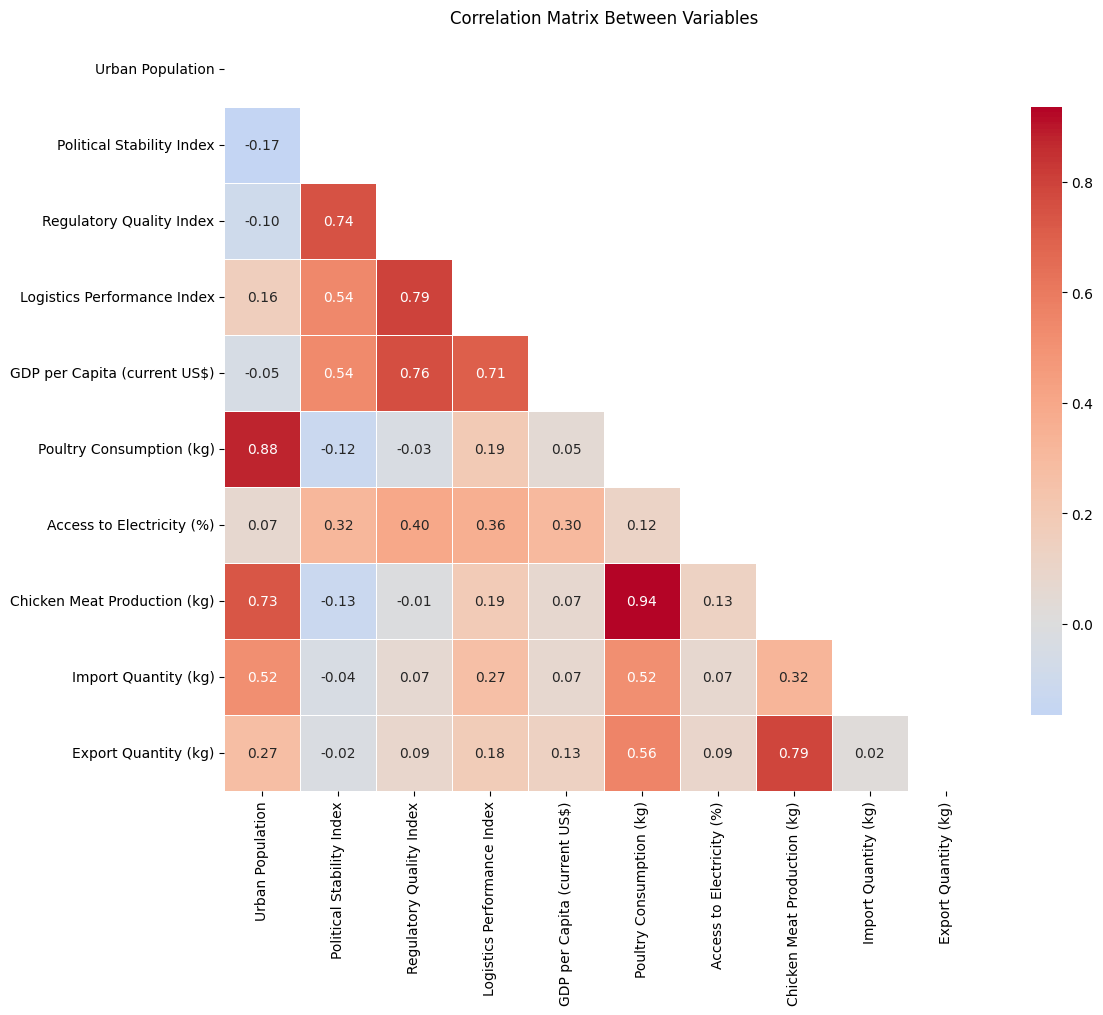

Urban Population ↔ Poultry Consumption (kg): 0.88
Urban Population ↔ Chicken Meat Production (kg): 0.73
Political Stability Index ↔ Regulatory Quality Index: 0.74
Regulatory Quality Index ↔ Logistics Performance Index: 0.79
Regulatory Quality Index ↔ GDP per Capita (current US$): 0.76
Logistics Performance Index ↔ GDP per Capita (current US$): 0.71
Poultry Consumption (kg) ↔ Chicken Meat Production (kg): 0.94
Chicken Meat Production (kg) ↔ Export Quantity (kg): 0.79


In [7]:
# Correlation matrix
correlation_matrix = X.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Between Variables')
plt.tight_layout()
plt.show()

# High correlations
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            print(f"{correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")

### Scree Plot

Explained variance ratio per component:
[0.3572 0.3144 0.113  0.0792 0.0475 0.041  0.0268 0.0131 0.0069 0.0009]
Cumulative explained variance:
[0.3572 0.6716 0.7847 0.8639 0.9114 0.9524 0.9792 0.9922 0.9991 1.    ]


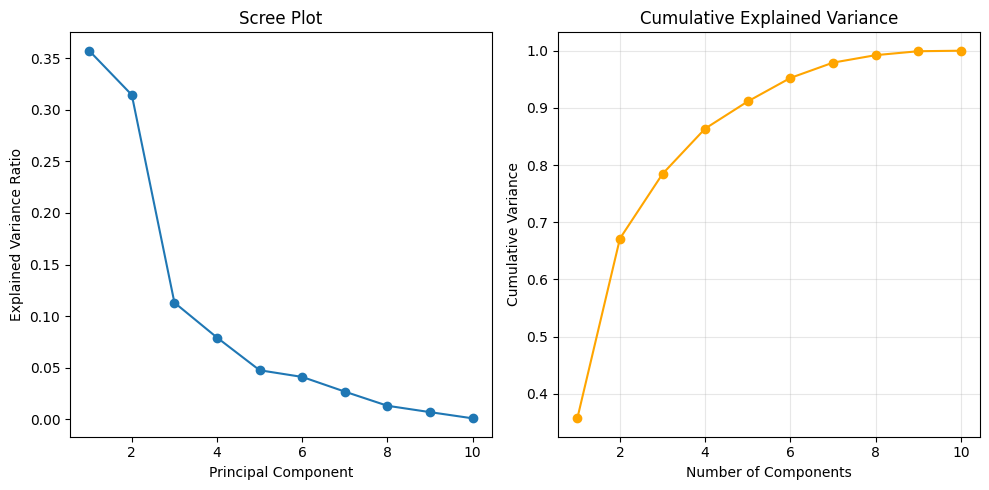

In [8]:
# Fit PCA on standardized data
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_var = pca.explained_variance_ratio_
print('Explained variance ratio per component:')
print(np.round(explained_var, 4))
print('Cumulative explained variance:')
print(np.round(np.cumsum(explained_var), 4))

# Scree plot and cumulative variance
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1,2,2)
plt.plot(range(1, len(explained_var)+1), np.cumsum(explained_var), marker='o', color='orange')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

visually we can see that first 4 components explain most of the variance, however we will try to examine statistically significant components using permutation test below.

Kaiser criterion (eigenvalue > 1): 3 components → 78.5% variance

80% variance threshold: 4 components
85% variance threshold: 4 components
90% variance threshold: 5 components


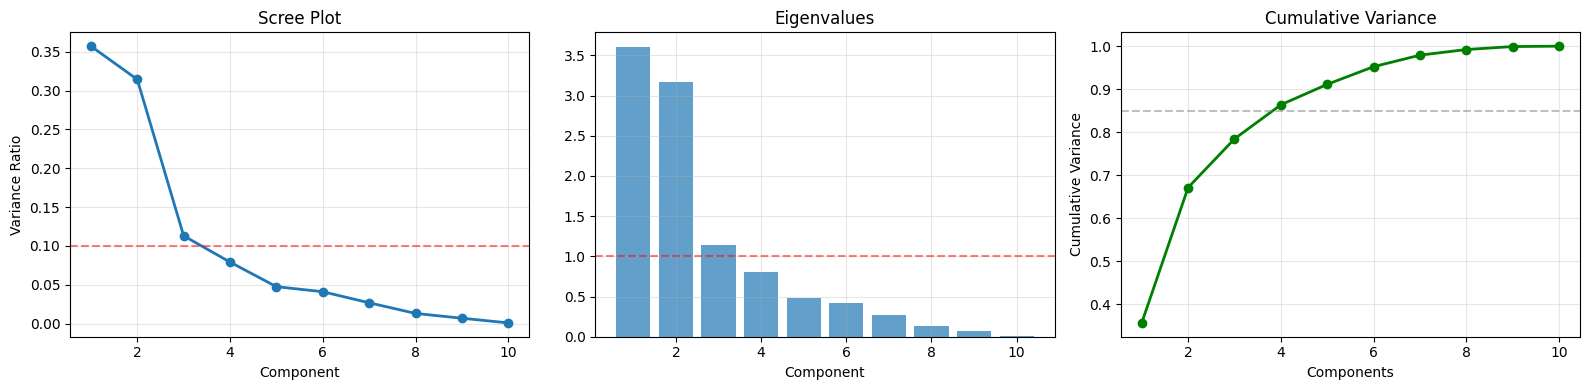


Decision: Use 3 components for clustering (78.5% variance)
Visualize with 2 components (PC1-PC2) for interpretability


In [17]:
eigenvalues = pca.explained_variance_
cumsum_var = np.cumsum(explained_var)

# Kaiser criterion
kaiser_n = (eigenvalues > 1).sum()
print(f"Kaiser criterion (eigenvalue > 1): {kaiser_n} components → {cumsum_var[kaiser_n-1]:.1%} variance\n")

# Variance thresholds
for threshold in [0.80, 0.85, 0.90]:
    n_comp = np.argmax(cumsum_var >= threshold) + 1
    print(f"{threshold:.0%} variance threshold: {n_comp} components")

# Broken stick model
def broken_stick(n):
    return np.array([sum(1/np.arange(i, n+1)) for i in range(1, n+1)]) / n

bs = broken_stick(len(eigenvalues))
broken_stick_n = (explained_var > bs).sum()

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Scree with Kaiser
axes[0].plot(range(1, len(explained_var)+1), explained_var, 'o-', linewidth=2)
axes[0].axhline(y=1/len(explained_var), color='r', linestyle='--', alpha=0.5)
axes[0].set_title('Scree Plot')
axes[0].set_xlabel('Component')
axes[0].set_ylabel('Variance Ratio')
axes[0].grid(alpha=0.3)

# Eigenvalues
axes[1].bar(range(1, len(eigenvalues)+1), eigenvalues, alpha=0.7)
axes[1].axhline(y=1, color='r', linestyle='--', alpha=0.5)
axes[1].set_title('Eigenvalues')
axes[1].set_xlabel('Component')
axes[1].grid(alpha=0.3)

# Cumulative variance
axes[2].plot(range(1, len(cumsum_var)+1), cumsum_var, 'o-', linewidth=2, color='green')
axes[2].axhline(y=0.85, color='gray', linestyle='--', alpha=0.5)
axes[2].set_title('Cumulative Variance')
axes[2].set_xlabel('Components')
axes[2].set_ylabel('Cumulative Variance')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nDecision: Use {kaiser_n} components for clustering ({cumsum_var[kaiser_n-1]:.1%} variance)")
print(f"Visualize with 2 components (PC1-PC2) for interpretability")

Correlation between Variables and Principal Components:
                                PC1    PC2
Urban Population              0.673 -0.555
Political Stability Index     0.314  0.761
Regulatory Quality Index      0.508  0.803
Logistics Performance Index   0.676  0.582
GDP per Capita (current US$)  0.516  0.675
Poultry Consumption (kg)      0.809 -0.557
Access to Electricity (%)     0.406  0.354
Chicken Meat Production (kg)  0.800 -0.527
Import Quantity (kg)          0.505 -0.234
Export Quantity (kg)          0.600 -0.282


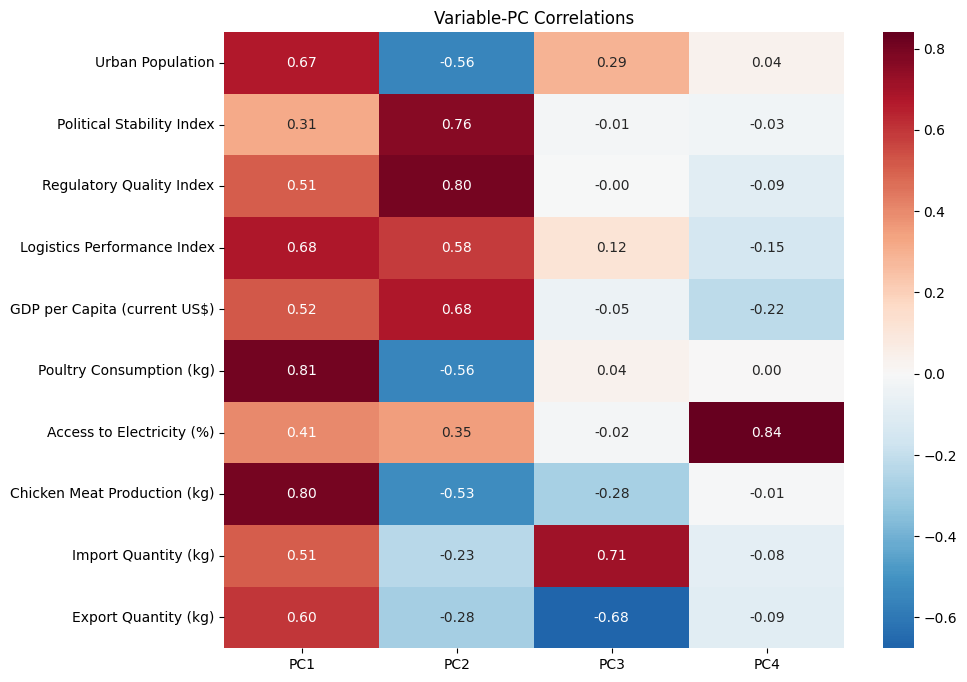

In [21]:
# Correlation between original variables and Principal Components
pca_corr = pd.DataFrame(
    pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i+1}' for i in range(len(numeric_cols))],
    index=numeric_cols
)

print("Correlation between Variables and Principal Components:")
print(pca_corr.iloc[:, :2].round(3))  # First 2 PCs

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(pca_corr.iloc[:, :4], annot=True, fmt='.2f', cmap='RdBu_r', center=0)
plt.title('Variable-PC Correlations')
plt.show()

### PCA visualization in 2D

In [9]:
import plotly.express as px
import plotly.graph_objects as go

# Choose number of components (2D for visualization)
pc = 2
pca_2 = PCA(n_components=pc)
X_pca_2 = pca_2.fit_transform(X_scaled)

# Prepare a DataFrame with PCs and identifiers
pc_cols = [f'PC{i+1}' for i in range(pc)]
df_pca = pd.DataFrame(X_pca_2, columns=pc_cols, index=X.index)
if ids is not None:
    df_pca = pd.concat([ids.reset_index(drop=True), df_pca.reset_index(drop=True)], axis=1)
    
# Create interactive scatter plot
fig = px.scatter(df_pca, 
                x='PC1', 
                y='PC2',
                hover_data=['Country Code'] if 'Country Code' in df_pca.columns else None,
                title='Interactive PCA: Chicken Market Analysis',
                labels={
                    'PC1': 'PC1 - Market Size Factor',
                    'PC2': 'PC2 - Economic Development Factor'
                })

# Customize hover template
fig.update_traces(
    hovertemplate='<b>%{hovertext}</b><br>' +
                  'Market Size (PC1): %{x:.2f}<br>' +
                  'Economic Development (PC2): %{y:.2f}' +
                  '<extra></extra>',
    hovertext=df_pca['Country Code'] if 'Country Code' in df_pca.columns else df_pca.index
)

# Add quadrant lines for market segmentation
fig.add_hline(y=0, line_dash="dash", line_color="gray", opacity=0.5)
fig.add_vline(x=0, line_dash="dash", line_color="gray", opacity=0.5)

# Add quadrant labels
fig.add_annotation(x=2, y=2, text="Large & Developed<br>(Premium Markets)", 
                  showarrow=False, bgcolor="lightblue", opacity=0.7)
fig.add_annotation(x=2, y=-2, text="Large & Developing<br>(Volume Markets)", 
                  showarrow=False, bgcolor="lightgreen", opacity=0.7)
fig.add_annotation(x=-2, y=2, text="Small & Developed<br>(Niche Markets)", 
                  showarrow=False, bgcolor="lightyellow", opacity=0.7)
fig.add_annotation(x=-2, y=-2, text="Small & Developing<br>(Emerging Markets)", 
                  showarrow=False, bgcolor="lightcoral", opacity=0.7)

fig.update_layout(width=800, height=600)
fig.show()

### Feature loadings

Top contributors to PC1:
Poultry Consumption (kg)        0.426113
Chicken Meat Production (kg)    0.421048
Logistics Performance Index     0.356038
Urban Population                0.354103
Export Quantity (kg)            0.316142
GDP per Capita (current US$)    0.271512
Regulatory Quality Index        0.267530
Import Quantity (kg)            0.266145
Access to Electricity (%)       0.213600
Political Stability Index       0.165226
Name: PC1, dtype: float64

Top contributors to PC2:
Regulatory Quality Index        0.450669
Political Stability Index       0.427305
GDP per Capita (current US$)    0.379129
Logistics Performance Index     0.326738
Access to Electricity (%)       0.198640
Import Quantity (kg)           -0.131249
Export Quantity (kg)           -0.158042
Chicken Meat Production (kg)   -0.295547
Urban Population               -0.311604
Poultry Consumption (kg)       -0.312578
Name: PC2, dtype: float64



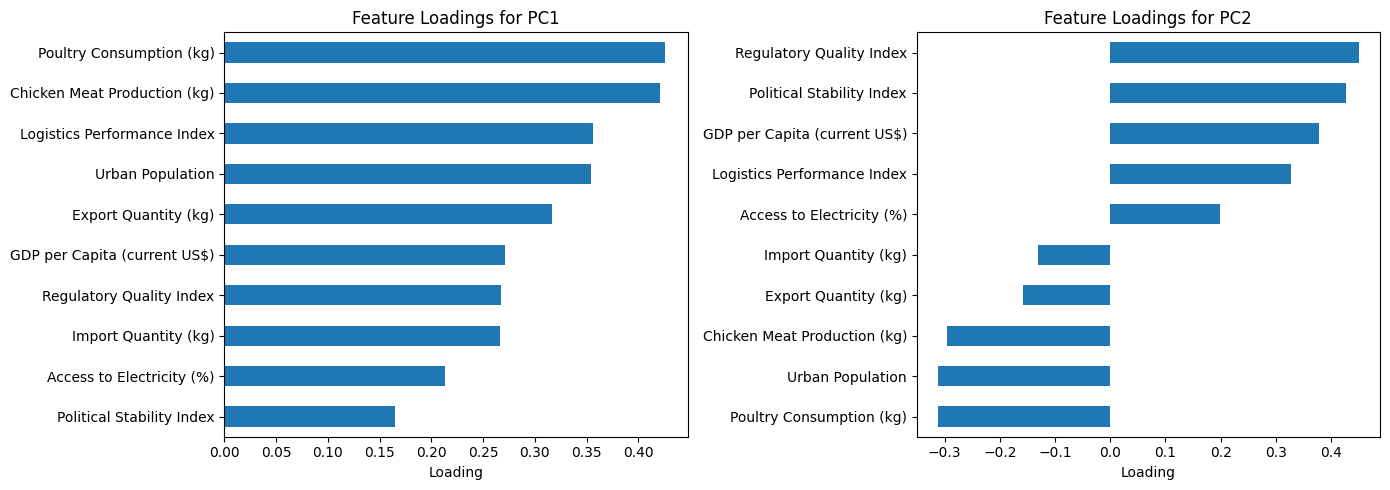

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Urban Population,0.354,-0.312,0.274,0.044,0.336,-0.437,0.086,0.043,0.619,0.066
Political Stability Index,0.165,0.427,-0.013,-0.031,0.733,0.347,-0.204,-0.297,0.021,0.029
Regulatory Quality Index,0.268,0.451,-0.002,-0.100,0.044,0.021,0.161,0.829,-0.007,-0.001
Logistics Performance Index,0.356,0.327,0.109,-0.165,-0.200,-0.118,0.687,-0.434,-0.114,-0.020
GDP per Capita (current US$),0.272,0.379,-0.048,-0.240,-0.355,-0.396,-0.635,-0.170,0.086,0.012
Poultry Consumption (kg),0.426,-0.313,0.037,0.001,0.162,-0.109,-0.122,0.045,-0.501,-0.643
Access to Electricity (%),0.214,0.199,-0.016,0.940,-0.162,0.013,-0.047,-0.046,0.027,-0.012
Chicken Meat Production (kg),0.421,-0.296,-0.259,-0.010,0.052,0.001,-0.047,0.027,-0.374,0.723
Import Quantity (kg),0.266,-0.131,0.665,-0.089,-0.296,0.578,-0.167,0.011,0.077,0.077
Export Quantity (kg),0.316,-0.158,-0.633,-0.104,-0.196,0.414,0.045,-0.036,0.446,-0.228


In [10]:
# Feature loadings (contribution of each original feature to PCs)
loadings = pd.DataFrame(
    pca.components_.T,
    index=numeric_cols,
    columns=[f'PC{i+1}' for i in range(len(numeric_cols))]
)

# Show top contributing features for PC1 and PC2
for i in range(2):
    pc_name = f'PC{i+1}'
    print(f"Top contributors to {pc_name}:")
    print(loadings[pc_name].sort_values(ascending=False).head(10))
    print()

# Visualize loadings for PC1 & PC2
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for i, ax in enumerate(axes[:2]):
    pc_name = f'PC{i+1}'
    loading_sorted = loadings[pc_name].sort_values()
    loading_sorted.plot(kind='barh', ax=ax)
    ax.set_title(f'Feature Loadings for {pc_name}')
    ax.set_xlabel('Loading')
plt.tight_layout()
plt.show()

loadings.round(3)

### Biplot + Correlation Circle
We overlay feature loadings as arrows on the PC1–PC2 scores (biplot) and show a correlation circle to interpret contributions.

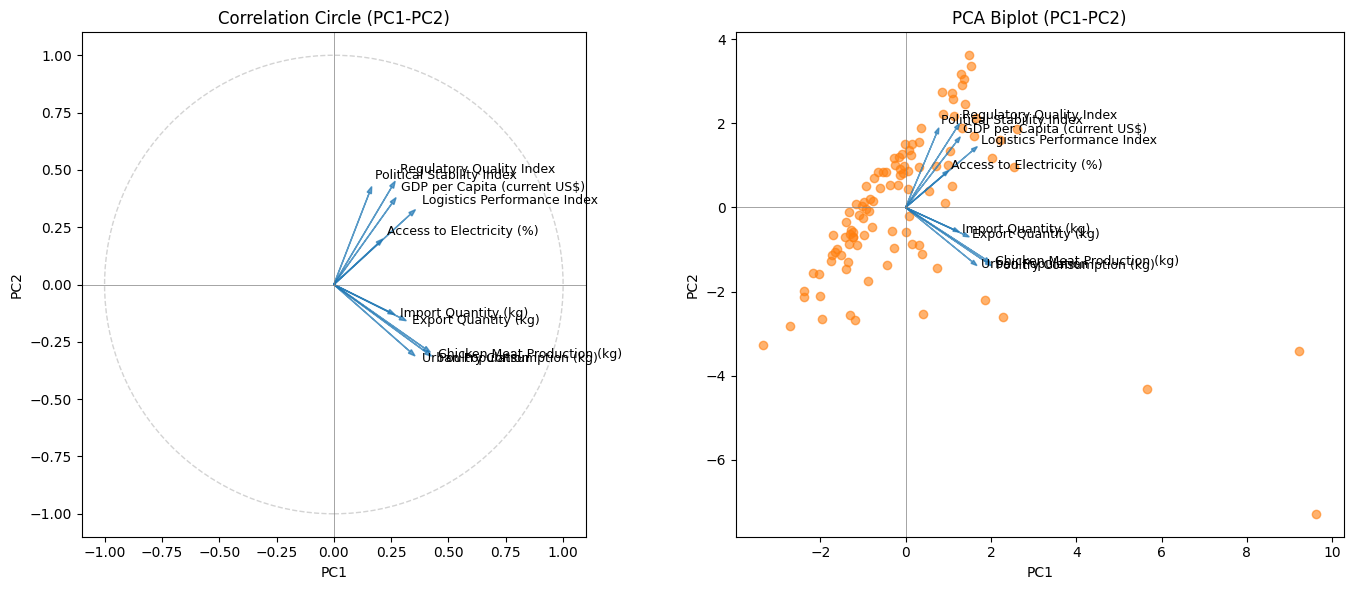

In [11]:
# Biplot: PC scores with feature loadings as arrows
# Use the PCA already fitted into `pca` (full), `numeric_cols`, `X_scaled`, and `df_pca` with PC1/PC2

# 1) Correlation circle (unit circle) and feature vectors on PC1-PC2
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# Left: correlation circle
ax0 = ax[0]
circle = plt.Circle((0,0), 1, color='lightgrey', fill=False, linestyle='--')
ax0.add_artist(circle)

# Project loadings of first two PCs
loadings_2d = pca.components_.T[:, :2]
for i, feature in enumerate(numeric_cols):
    x, y = loadings_2d[i, 0], loadings_2d[i, 1]
    ax0.arrow(0, 0, x, y, color='tab:blue', alpha=0.7, head_width=0.02, length_includes_head=True)
    ax0.text(x*1.08, y*1.08, feature, fontsize=9)

ax0.set_title('Correlation Circle (PC1-PC2)')
ax0.set_xlabel('PC1')
ax0.set_ylabel('PC2')
ax0.axhline(0, color='grey', linewidth=0.5)
ax0.axvline(0, color='grey', linewidth=0.5)
ax0.set_aspect('equal', 'box')
ax0.set_xlim(-1.1, 1.1)
ax0.set_ylim(-1.1, 1.1)

# Right: biplot (scores + scaled loadings)
ax1 = ax[1]
ax1.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.6, color='tab:orange')

# Scale loading vectors to score space for visibility
scores_std = np.std(df_pca[['PC1','PC2']], axis=0).values
load_scale = 2.5 * scores_std  # tweak factor for readability
for i, feature in enumerate(numeric_cols):
    x, y = loadings_2d[i, 0]*load_scale[0], loadings_2d[i, 1]*load_scale[1]
    ax1.arrow(0, 0, x, y, color='tab:blue', alpha=0.7, head_width=0.02*load_scale[0], length_includes_head=True)
    ax1.text(x*1.05, y*1.05, feature, fontsize=9)

ax1.set_title('PCA Biplot (PC1-PC2)')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.axhline(0, color='grey', linewidth=0.5)
ax1.axvline(0, color='grey', linewidth=0.5)
plt.tight_layout()
plt.show()

base on the attributes that related to PC1 such as import, export, consumption, production, and urbanization population, we can consider this as Market size factor. Whereas PC2 related more to the reulatory, political, gdp, logistic, and access to electricity, we can considered them as Economic development factor.

## Clustering Analysis  

### Hierarchical Clustering Dendrogram

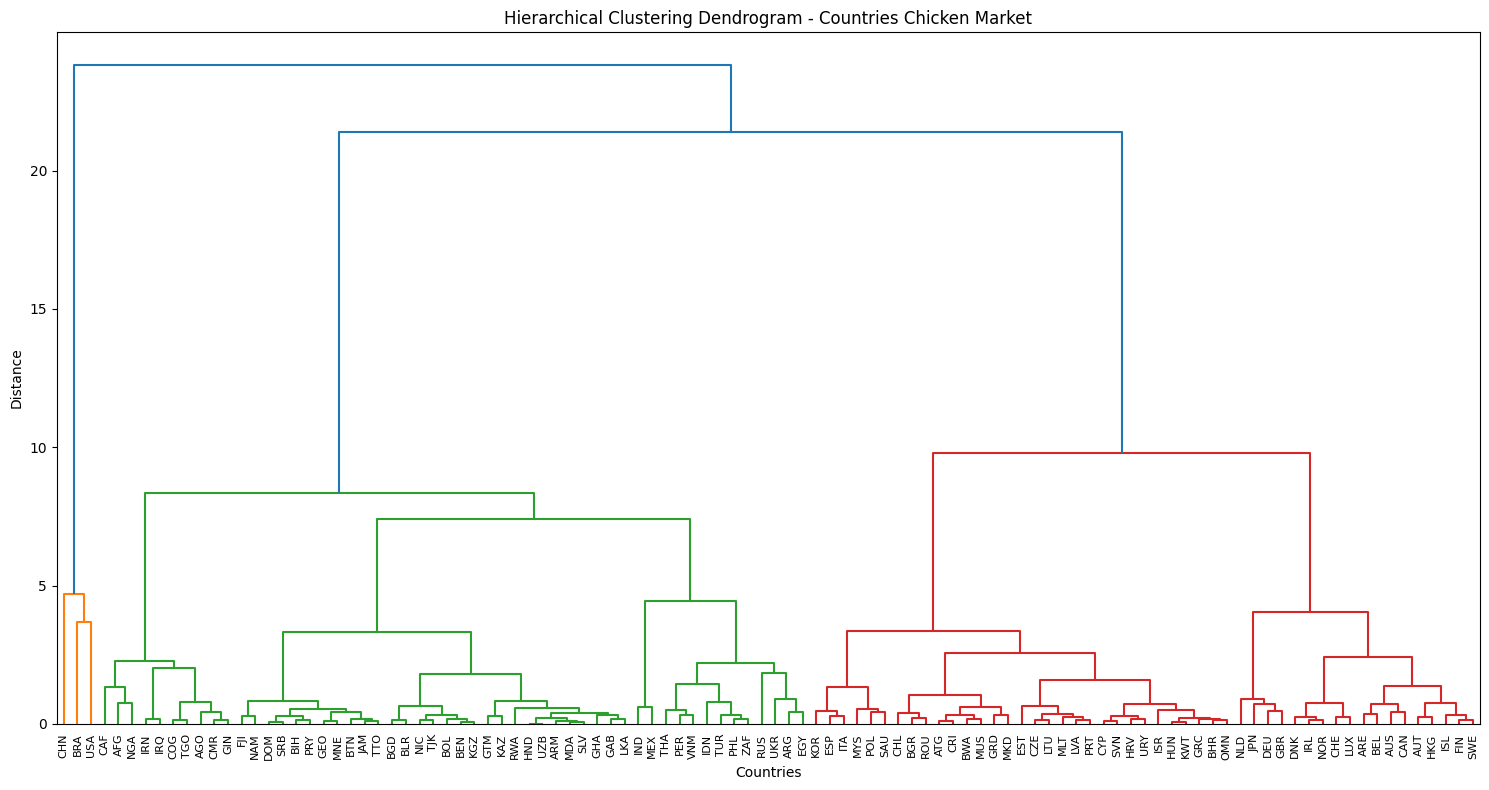

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use PCA coordinates for clustering (PC1 and PC2)
X_for_clustering = df_pca[['PC1', 'PC2']].values

# Create linkage matrix using Ward method
linkage_matrix = linkage(X_for_clustering, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendro = dendrogram(linkage_matrix, 
                   labels=df_pca['Country Code'].values if 'Country Code' in df_pca.columns else None,
                   leaf_rotation=90,
                   leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram - Countries Chicken Market')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

Our dendrogram shows how countries are grouped based on market characteristics. We can clearly see that there are 3 categories of countries. This implies that we can segment the markets into 3 distinct clusters for targeted strategies.

3 clusters: Silhouette = 0.489
4 clusters: Silhouette = 0.429
5 clusters: Silhouette = 0.425


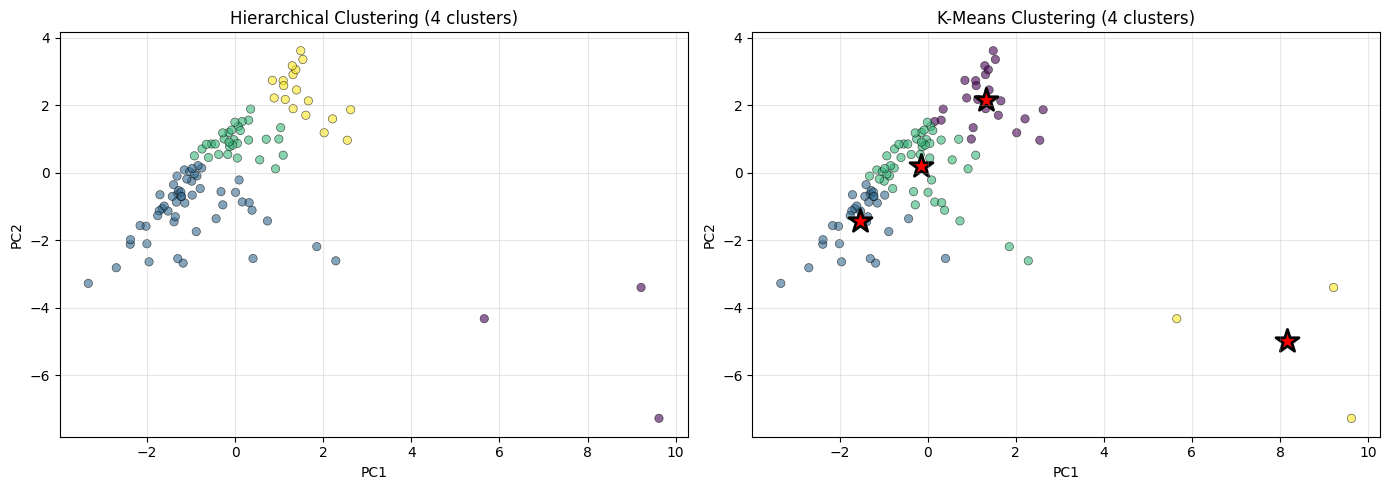

In [19]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Test different cluster numbers
for n in [3, 4, 5]:
    labels = fcluster(linkage_matrix, n, criterion='maxclust')
    sil = silhouette_score(X_for_clustering, labels)
    print(f"{n} clusters: Silhouette = {sil:.3f}")

# Use best n
best_n = 4
hierarchical_labels = fcluster(linkage_matrix, best_n, criterion='maxclust')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Hierarchical
axes[0].scatter(df_pca['PC1'], df_pca['PC2'], c=hierarchical_labels, 
                cmap='viridis', alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_title(f'Hierarchical Clustering ({best_n} clusters)')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(alpha=0.3)

# K-means (rerun optimal)
kmeans_final = KMeans(n_clusters=best_n, random_state=42)
kmeans_labels = kmeans_final.fit_predict(X_for_clustering)

axes[1].scatter(df_pca['PC1'], df_pca['PC2'], c=kmeans_labels,
                cmap='viridis', alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1].scatter(kmeans_final.cluster_centers_[:, 0], 
                kmeans_final.cluster_centers_[:, 1],
                c='red', s=300, marker='*', edgecolors='black', linewidth=2)
axes[1].set_title(f'K-Means Clustering ({best_n} clusters)')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

df_pca['Cluster'] = kmeans_labels

The Silhouette score for the dendogram showing that k=3 is the optimal number of clusters.

### K-Means Clustering  

#### Elbow Method for K-Means Clustering

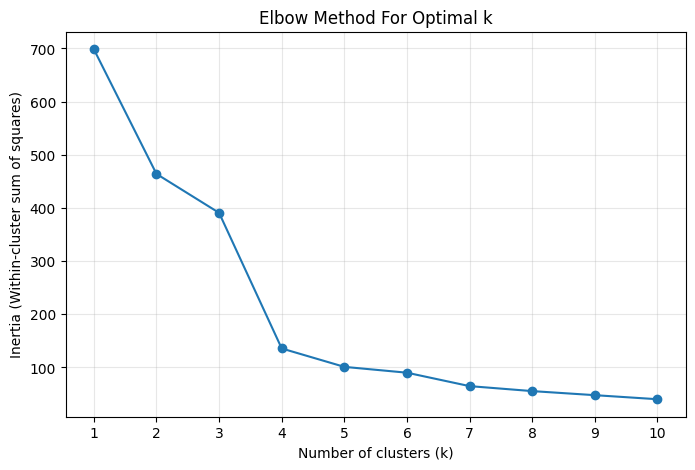

In [13]:
inertia = []
K_range = range(1, 11)
X_for_clustering = df_pca[['PC1', 'PC2']].values

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_for_clustering)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.show()

However, based on the elbow method it seems that k=4 is a better choice than k=3. This suggests that we may want to consider 4 clusters for our K-Means analysis. 

In [16]:
for k in [3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_for_clustering)
    score = silhouette_score(X_for_clustering, labels)
    print(f"Silhouette score for k={k}: {score:.3f}")

Silhouette score for k=3: 0.342
Silhouette score for k=4: 0.402
Silhouette score for k=5: 0.447
Silhouette score for k=6: 0.436


Base on the silhouette score k=4 is much better than k=3 while k=5 and k=6 is not so different from k=4 so it is indeed that k=4 would be optimal for clustering.

In [15]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2']])

# 3. Visualize clusters
fig = px.scatter(df_pca, x='PC1', y='PC2', color='Cluster', 
                 hover_data=['Country Code'] if 'Country Code' in df_pca.columns else None,
                 title='K-means Clusters on PCA')
fig.show()

In [29]:
import plotly.express as px

# Prepare data for map visualization
map_data = df_pca.copy()

# Convert Cluster to string for better legend
map_data['Cluster_Label'] = map_data['Cluster'].astype(str)

# Create cluster names based on your PCA interpretation
cluster_names = {
    0: 'Cluster 0',
    1: 'Cluster 1', 
    2: 'Cluster 2',
    3: 'Cluster 3'
}
map_data['Cluster_Name'] = map_data['Cluster'].map(cluster_names)

# Create choropleth map
fig = px.choropleth(
    map_data,
    locations='Country Code',  # ISO country codes
    color='Cluster',
    hover_name='Country Code',
    hover_data={
        'Country Code': True,
        'PC1': ':.2f',
        'PC2': ':.2f',
        'Cluster': True,
        'Cluster_Name': True
    },
    color_continuous_scale='Viridis',
    title='Chicken Market Clusters - Global Distribution',
    labels={'Cluster': 'Market Cluster'}
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    height=600,
    width=1000
)

fig.show()

In [32]:
# Merge original data with cluster assignments
cluster_analysis = df.loc[df_pca.index].copy()
cluster_analysis['Cluster'] = df_pca['Cluster']

# Profile each cluster
for cluster in sorted(cluster_analysis['Cluster'].unique()):
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster} PROFILE")
    print(f"{'='*60}")
    
    cluster_data = cluster_analysis[cluster_analysis['Cluster'] == cluster]
    print(f"Number of countries: {len(cluster_data)}")
    print(f"\nCountries: {', '.join(cluster_data['Country Code'].values[:10])}")
    if len(cluster_data) > 10:
        print(f"...and {len(cluster_data)-10} more")
    
    print(f"\n--- Key Metrics (Mean) ---")
    key_metrics = [
        # 'Total Population',
        # 'Population Growth Rate', 'Urban Population Growth Rate',
        'Urban Population', 'Political Stability Index',
        'Regulatory Quality Index', 'Logistics Performance Index',
        'GDP per Capita (current US$)', 
        # 'GDP per Capita Growth (%)',
        'Poultry Consumption (kg)',
        'Access to Electricity (%)',
        'Chicken Meat Production (kg)', 'Import Quantity (kg)',
        'Export Quantity (kg)'
    ]
    
    for metric in key_metrics:
        if metric in cluster_data.columns:
            mean_val = cluster_data[metric].mean()
            print(f"{metric}: {mean_val:,.0f}")


CLUSTER 0 PROFILE
Number of countries: 23

Countries: ARE, AUS, AUT, BEL, CAN, CHE, CZE, DEU, DNK, ESP
...and 13 more

--- Key Metrics (Mean) ---
Urban Population: 20,318,093
Political Stability Index: 1
Regulatory Quality Index: 1
Logistics Performance Index: 4
GDP per Capita (current US$): 58,173
Poultry Consumption (kg): 669,160,178
Access to Electricity (%): 100
Chicken Meat Production (kg): 561,001,241
Import Quantity (kg): 176,350,720
Export Quantity (kg): 122,551,727

CLUSTER 1 PROFILE
Number of countries: 31

Countries: AFG, AGO, ARM, BEN, BGD, BLR, BOL, CAF, CMR, COG
...and 21 more

--- Key Metrics (Mean) ---
Urban Population: 20,719,558
Political Stability Index: -1
Regulatory Quality Index: -1
Logistics Performance Index: 3
GDP per Capita (current US$): 3,735
Poultry Consumption (kg): 513,939,954
Access to Electricity (%): 82
Chicken Meat Production (kg): 456,367,375
Import Quantity (kg): 66,603,546
Export Quantity (kg): 27,782,256

CLUSTER 2 PROFILE
Number of countries: 47

In [ ]:
# Create scoring matrix
scoring_criteria = {
    'Market Size': cluster_analysis.groupby('Cluster')['Urban Population'].mean(),
    'Growth Potential': cluster_analysis.groupby('Cluster')['Poultry Consumption (kg)'].mean(),
    'Economic Capacity': cluster_analysis.groupby('Cluster')['GDP per Capita (current US$)'].mean(),
    'Market Stability': cluster_analysis.groupby('Cluster')['Political Stability Index'].mean(),
    'Trade Volume': (cluster_analysis.groupby('Cluster')['Import Quantity (kg)'].mean() + 
                     cluster_analysis.groupby('Cluster')['Export Quantity (kg)'].mean())
}

# Normalize scores (0-100)
from sklearn.preprocessing import MinMaxScaler
scoring_df = pd.DataFrame(scoring_criteria)
scaler = MinMaxScaler(feature_range=(0, 100))
scoring_normalized = pd.DataFrame(
    scaler.fit_transform(scoring_df),
    columns=scoring_df.columns,
    index=scoring_df.index
)

# Weighted score
weights = {
    'Market Size': 0.25,
    'Growth Potential': 0.30,
    'Economic Capacity': 0.20,
    'Market Stability': 0.15,
    'Trade Volume': 0.10
}

scoring_normalized['Total Score'] = sum(
    scoring_normalized[criteria] * weight 
    for criteria, weight in weights.items()
)

print("\n" + "="*80)
print("CLUSTER ATTRACTIVENESS SCORES")
print("="*80)
print(scoring_normalized.round(1))


CLUSTER ATTRACTIVENESS SCORES
         Market Size  Growth Potential  Economic Capacity  Market Stability  \
Cluster                                                                       
0                0.0               0.9              100.0             100.0   
1                0.1               0.0                0.0               0.0   
2                1.9               1.6               22.9              60.6   
3              100.0             100.0               54.4              33.2   

         Trade Volume  Total Score  
Cluster                             
0                 6.5         35.9  
1                 0.0          0.0  
2                 1.9         14.8  
3               100.0         80.9  
